# Statistical Arbitrage売買戦略(共和分を用いたペアトレード)のデモ

Automate Statistical Arbitrage Using Python: A Step-by-Step Guide with Examples

https://medium.com/@nomadworld/automate-statistical-arbitrage-using-python-a-step-by-step-guide-with-examples-654c488cb0d7

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import yfinance as yf
from pandas_datareader import data as pdr
import statsmodels.api as sm

In [5]:
symbol1 = '9201.T' # 9201は日本航空
symbol2 = '9202.T' # 9202はANAホールディングス
start_date = '2020-01-01'
end_date = '2023-10-31'
yf.pdr_override()
# yahooサイトからデータをダウンロード
security1_data = pdr.get_data_yahoo(symbol1, start_date, end_date)
security2_data = pdr.get_data_yahoo(symbol2, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


〔試したペア〕
鹿島vs清水建設, 日本製鉄vsJFE, パナソニックvsソニー, 関西電力vs九州電力, 三菱商事vs三井物産, 東京ガスvs大阪ガス, ヤマト運輸vs佐川急便, 中外製薬vs第一三共, 商船三井vs川崎汽船, 日産自動車vs本田技研, 三菱ケミカルvs住友化学, 小松製作所vs日立建機, 住友金属工業vs三菱マテリアル, 住友ゴムvs横浜ゴム

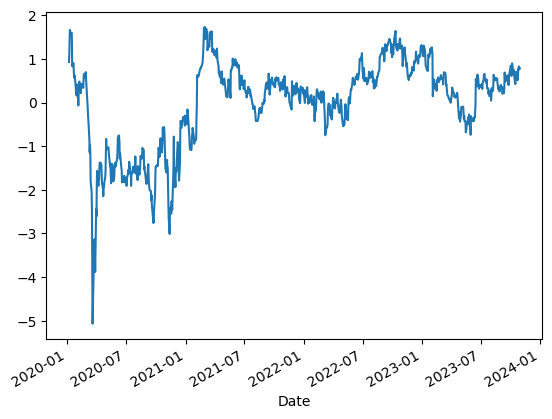

In [6]:
# 共和分についての検定の実施
result = sm.tsa.stattools.coint(security1_data['Close'], security2_data['Close'])
# 線形回帰モデルのあてはめ
model = sm.OLS(security1_data['Close'], security2_data['Close']).fit()
if result[1] < 0.05:
    # 共和分が存在する場合に、スプレッド（残渣）とそのＺスコアを求める
    spread = security1_data['Close'] - model.params[0] * security2_data['Close']
    mean = np.mean(spread)
    std = np.std(spread)
    zscore = (spread - mean) / std
    zscore.plot()

In [7]:
result[1]

0.0341828626413191

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          2.716e+05
Date:                Fri, 03 Nov 2023   Prob (F-statistic):                        0.00
Time:                        13:56:18   Log-Likelihood:                         -5967.5
No. Observations:                 935   AIC:                                  1.194e+04
Df Residuals:                     934   BIC:                                  1.194e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close          0.8973      0.002    521.110      0.000       0.894       0.901
==============================================================================
Omnibus:                      142.193   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.138
Skew:                          -1.046   Prob(JB):                     3.17e-47
Kurtosis:                       4.059   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Date'>

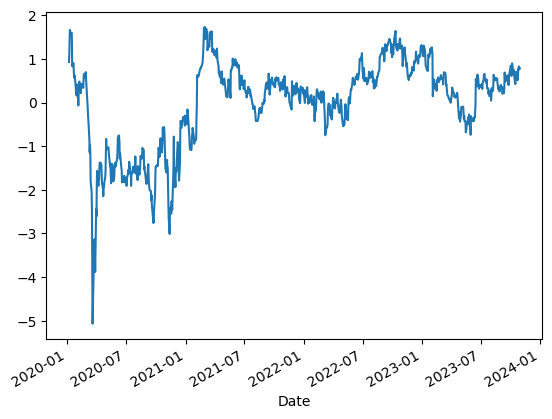

In [9]:
zscore.plot()